## **Gender Differences in Choosing Jobs and Departments on Glassdoor**

**Using the Glassdoor Gender pay gab analysis dataset, answer the following questions:**
1. We want to know whether men and women choose different jobs. (and if so which job)
2. We want to know whether men and women choose different departments. (and if so which department)

**Rules**
   - Only apply a test if it's conditions are met, if the conditions aren't met simply say "the test can't be performed"
   - When possible calculate the probability of (type 1 error, type 2 error) and mention the probability of your conclusion being wrong.
   - Phrase your conclusions clearly don't just say reject or fail to reject
   - Try to incorporate your conclusions with the appropriate graphs.

In [1]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('Glassdoor Gender Pay Gap.csv')
data

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
...,...,...,...,...,...,...,...,...,...
995,Marketing Associate,Female,61,1,High School,Administration,1,62644,3270
996,Data Scientist,Male,57,1,Masters,Sales,2,108977,3567
997,Financial Analyst,Male,48,1,High School,Operations,1,92347,2724
998,Financial Analyst,Male,65,2,High School,Administration,1,97376,2225


<Axes: xlabel='Gender', ylabel='count'>

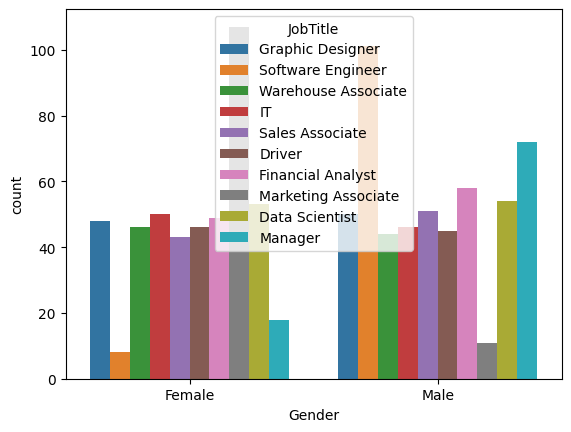

In [3]:
sns.countplot(data, x = 'Gender', hue = 'JobTitle')

<Axes: xlabel='Gender', ylabel='JobTitle'>

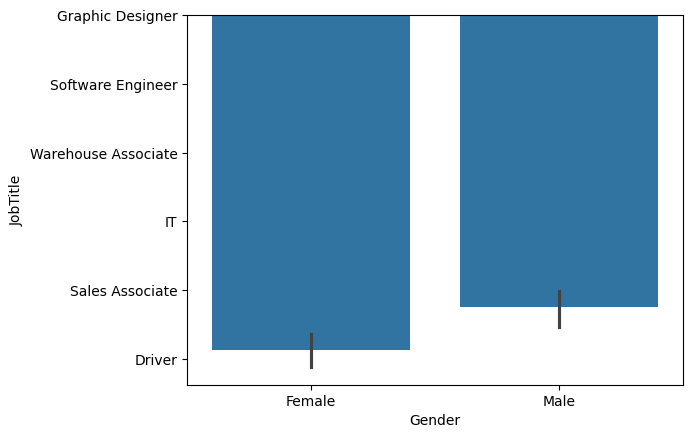

In [4]:
sns.barplot(data, x = 'Gender', y = 'JobTitle')

In [5]:
observation = data.pivot_table(index='JobTitle', columns='Gender', aggfunc='size', fill_value=0)

In [6]:
observation

Gender,Female,Male
JobTitle,,
Data Scientist,53,54
Driver,46,45
Financial Analyst,49,58
Graphic Designer,48,50
IT,50,46
Manager,18,72
Marketing Associate,107,11
Sales Associate,43,51
Software Engineer,8,101


**Note**
  - I will use Chi-Square Test because the variables (Gender, JobTitle, Department) are categorical variables and calculate the relation between them.

In [7]:
stats.chi2_contingency(observation)

Chi2ContingencyResult(statistic=188.23545384004152, pvalue=9.631049089256313e-36, dof=9, expected_freq=array([[50.076, 56.924],
       [42.588, 48.412],
       [50.076, 56.924],
       [45.864, 52.136],
       [44.928, 51.072],
       [42.12 , 47.88 ],
       [55.224, 62.776],
       [43.992, 50.008],
       [51.012, 57.988],
       [42.12 , 47.88 ]]))

**First Assumption**
   - Males and females don't Choose different jobs.
   - We assume that proportion of males in each job aprroximetly = proportion of female in the same job 
     1. H0 => P(males) = P(females)
     2. H1 => P(males) != P(females)

**Answer**
   1. p-value (9.6*10^-36)  <  0.05
    or
   2. From Chi-square table statistic(Chi-Square) [df = 9 & 0.05] = 16.92  <  188.325
   
**So**
   - **Reject Null Hyposis** (the proportion of males in at least one job not equal the number of females in the same job)

In [8]:
# I will calculate the proportions to compare between them.
proportions = observation / observation.sum()
proportions

Gender,Female,Male
JobTitle,,
Data Scientist,0.113248,0.101504
Driver,0.098291,0.084586
Financial Analyst,0.104701,0.109023
Graphic Designer,0.102564,0.093985
IT,0.106838,0.086466
Manager,0.038462,0.135338
Marketing Associate,0.228632,0.020677
Sales Associate,0.091880,0.095865
Software Engineer,0.017094,0.189850


In [9]:
i = 0
p1 = proportions.iloc[i].iloc[0]
p2 = proportions.iloc[i].iloc[1]
n1 = observation.iloc[i].iloc[0]
n2 = observation.iloc[i].iloc[0]

SE = np.sqrt((p1 * (1 - p1) / n1) + (p2 * (1 - p2) / n2))

p_diff = p1 - p2
stats.norm.ppf(p_diff, scale=SE)

-0.1362169595987846

In [10]:
for i in range(len(proportions.index)):
    
    p1 = proportions.iloc[i].iloc[0]
    p2 = proportions.iloc[i].iloc[1]
    n1 = observation.iloc[i].iloc[0]
    n2 = observation.iloc[i].iloc[0]

    SE = np.sqrt((p1 * (1 - p1) / n1) + (p2 * (1 - p2) / n2))

    p_diff = p1 - p2
    stats.norm.ppf(p_diff, scale=SE)
    print(f"{observation.index[i]}:\n     P-value = {p_value}")

    if list(observation.loc[observation.index[i][0]]) * list(observation.loc[observation.index[i][0]]) < 10:
        print("Test can't be performed")
    elif p_value < 0.05:
        print(f"     Reject --> P_value ({p_value}) < 0.05")
    else:
        print(f"     Fail To Reject --> P_value ({p_value}) > 0.05")
    print()

NameError: name 'p_value' is not defined

<Axes: xlabel='Gender', ylabel='count'>

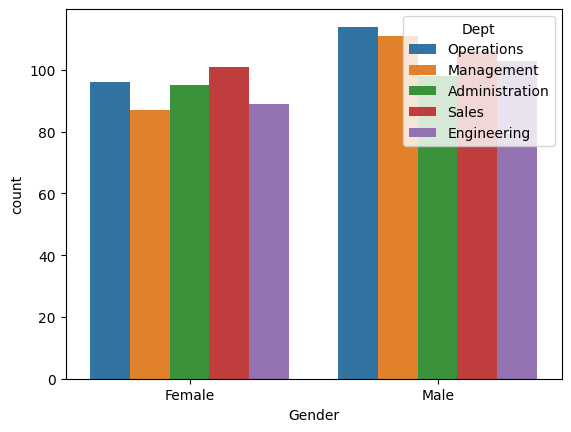

In [72]:
sns.countplot(data, x = 'Gender', hue = 'Dept')

<Axes: xlabel='Gender', ylabel='Dept'>

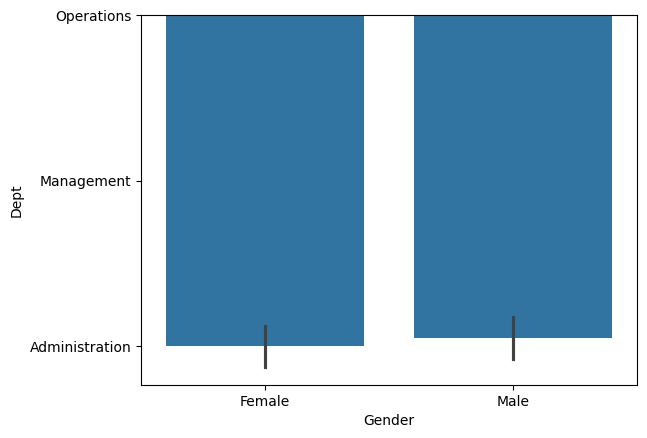

In [69]:
sns.barplot(data, x = 'Gender', y = 'Dept')

In [11]:
observation = data.pivot_table(index='Dept', columns='Gender', aggfunc='size', fill_value=0)

In [12]:
observation

Gender,Female,Male
Dept,,
Administration,95,98
Engineering,89,103
Management,87,111
Operations,96,114
Sales,101,106


In [13]:
stats.chi2_contingency(observation)

Chi2ContingencyResult(statistic=1.5505374579212654, pvalue=0.8176532590847562, dof=4, expected_freq=array([[ 90.324, 102.676],
       [ 89.856, 102.144],
       [ 92.664, 105.336],
       [ 98.28 , 111.72 ],
       [ 96.876, 110.124]]))

**Second Assumption** 
   - Males and females don't Choose different departments.
   - We assume that proportion of males in each department aprroximetly = proportion of female in the same department.
       1. H0 => P(males) = P(females)
       2. H1 => P(males) != P(females)

**Answer**
   1. p-value (0.82)  >  0.05
    or
   2. From Chi-square table statistic(Chi-Square) [df = 4 & 0.05] = 9.49  > 1.55
   
   **So**
   - **Fail To Reject Null Hyposis** (males and females choose the departments with nearly the same proportion)